

<hr style="margin-bottom: 40px;">

# China Life - MPF Portfolio Optimization Model

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (A) Understanding the data

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.read_excel("China Life.xlsx", parse_dates=True, index_col="date")


In [16]:
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df

,CLMTAGP HK Equity,CLMMBAF HK Equity,CLMTCOA HK Equity,CLMMGOF HK Equity,CLMMGRF HK Equity,CLHKEQF HK Equity,CLMPCOF HK Equity,CLREGEF HK Equity,CLREGUF HK Equity
date,,,,,,,,,
2000-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-04,NaN,NaN,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
2000-12-05,NaN,NaN,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
2000-12-06,NaN,10.00,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
2000-12-07,NaN,10.00,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-07-27,11.5720,26.87,12.0666,28.48,15.26,17.53,10.9956,11.83,15.11
2020-07-28,11.5440,26.55,12.0045,28.55,15.28,17.71,10.9957,11.90,15.11
2020-07-29,11.5715,26.69,12.0716,28.66,15.29,17.82,10.9959,11.92,15.11


In [18]:
df.info() #no need for type conversion.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLMTAGP HK Equity  818 non-null    float64
 1   CLMMBAF HK Equity  5050 non-null   float64
 2   CLMTCOA HK Equity  818 non-null    float64
 3   CLMMGOF HK Equity  5052 non-null   float64
 4   CLMMGRF HK Equity  5052 non-null   float64
 5   CLHKEQF HK Equity  2167 non-null   float64
 6   CLMPCOF HK Equity  5052 non-null   float64
 7   CLREGEF HK Equity  3271 non-null   float64
 8   CLREGUF HK Equity  3271 non-null   float64
dtypes: float64(9)
memory usage: 394.8 KB


In [19]:
df = df.drop(["CLMTAGP HK Equity", "CLMTCOA HK Equity"],axis=1) #dropped the funds that have not enough data for analysis.

In [20]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLMMBAF HK Equity  5050 non-null   float64
 1   CLMMGOF HK Equity  5052 non-null   float64
 2   CLMMGRF HK Equity  5052 non-null   float64
 3   CLHKEQF HK Equity  2167 non-null   float64
 4   CLMPCOF HK Equity  5052 non-null   float64
 5   CLREGEF HK Equity  3271 non-null   float64
 6   CLREGUF HK Equity  3271 non-null   float64
dtypes: float64(7)
memory usage: 315.8 KB


In [21]:
df.tail()  #check if funds are still in operation till now

,CLMMBAF HK Equity,CLMMGOF HK Equity,CLMMGRF HK Equity,CLHKEQF HK Equity,CLMPCOF HK Equity,CLREGEF HK Equity,CLREGUF HK Equity
date,,,,,,,
2020-07-27,26.87,28.48,15.26,17.53,10.9956,11.83,15.11
2020-07-28,26.55,28.55,15.28,17.71,10.9957,11.90,15.11
2020-07-29,26.69,28.66,15.29,17.82,10.9959,11.92,15.11
2020-07-30,26.74,28.47,15.29,17.71,10.9960,11.84,15.11
2020-07-31,26.83,28.33,15.30,17.68,10.9961,11.82,15.11


In [14]:
df.values

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ..., 10.    ,     nan,     nan],
       [    nan,     nan,     nan, ..., 10.    ,     nan,     nan],
       ...,
       [11.5715, 26.69  , 12.0716, ..., 10.9959, 11.92  , 15.11  ],
       [11.5761, 26.74  , 12.0557, ..., 10.996 , 11.84  , 15.11  ],
       [11.5916, 26.83  , 12.1043, ..., 10.9961, 11.82  , 15.11  ]])

In [12]:
df.dropna(axis="index",how="all") #drop NaN values. The earliest data starts from 2000-12-04.

,CLMTAGP HK Equity,CLMMBAF HK Equity,CLMTCOA HK Equity,CLMMGOF HK Equity,CLMMGRF HK Equity,CLHKEQF HK Equity,CLMPCOF HK Equity,CLREGEF HK Equity,CLREGUF HK Equity
date,,,,,,,,,
2000-12-04,NaN,NaN,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
2000-12-05,NaN,NaN,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
2000-12-06,NaN,10.00,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
2000-12-07,NaN,10.00,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
2000-12-08,NaN,10.00,NaN,10.00,10.00,NaN,10.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-07-27,11.5720,26.87,12.0666,28.48,15.26,17.53,10.9956,11.83,15.11
2020-07-28,11.5440,26.55,12.0045,28.55,15.28,17.71,10.9957,11.90,15.11
2020-07-29,11.5715,26.69,12.0716,28.66,15.29,17.82,10.9959,11.92,15.11


In [8]:
describe = df.describe()
describe

,CLMTAGP HK Equity,CLMMBAF HK Equity,CLMTCOA HK Equity,CLMMGOF HK Equity,CLMMGRF HK Equity,CLHKEQF HK Equity,CLMPCOF HK Equity,CLREGEF HK Equity,CLREGUF HK Equity
count,818.000000,5050.000000,818.000000,5052.000000,5052.000000,2167.000000,5052.000000,3271.000000,3271.000000
mean,10.452463,16.560800,10.940701,16.942476,12.582205,13.451998,10.557093,9.128089,12.586136
std,0.435373,5.178105,0.505815,5.931829,1.774070,2.533101,0.302426,1.946354,1.495149
min,9.921900,7.750000,9.598100,6.960000,9.850000,9.140000,9.980000,4.590000,10.000000
25%,10.130225,11.770000,10.582575,11.380000,10.630000,11.400000,10.140000,7.640000,11.425000
50%,10.218700,16.790000,10.963350,16.965000,12.750000,12.610000,10.750300,9.160000,12.630000
75%,10.888525,20.460000,11.222075,21.230000,14.520000,15.920000,10.755400,10.510000,13.905000
max,11.591600,26.960000,12.116600,29.240000,15.340000,19.010000,10.996100,13.340000,15.110000


Text(0.5, 1.0, 'Performance of Funds')

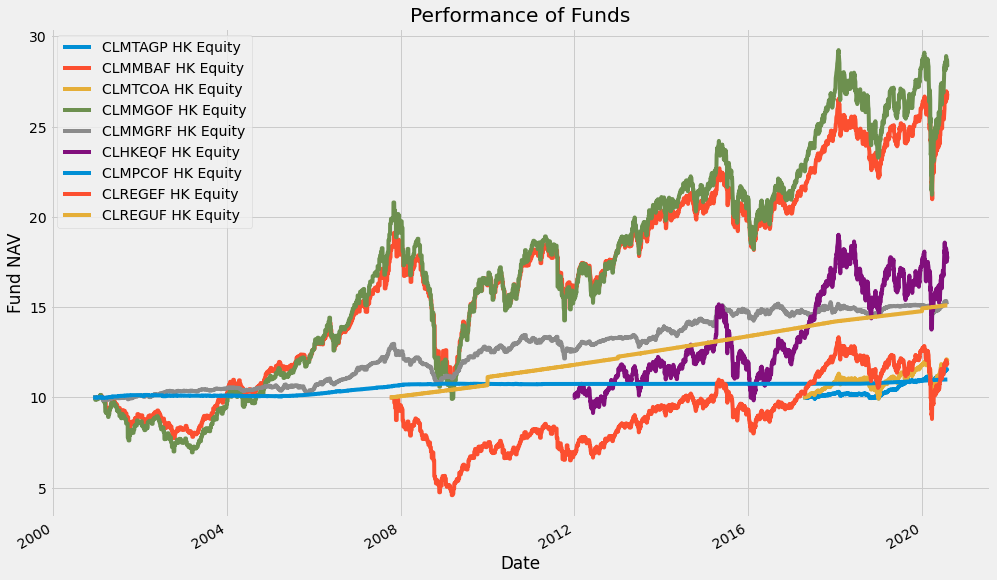

In [13]:
df.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Fund NAV')
plt.title("Performance of China Life Funds")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (B) - Data Modelling

In [15]:
from sklearn.model_selection import train_test_split

X = np.array(df["CLMTAGP HK Equity"]) 

y = np.array(df["CLMMBAF HK Equity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
#!pip install PyPortfolioOpt

In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [18]:
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(df).ledoit_wolf()
S

,CLMTAGP HK Equity,CLMMBAF HK Equity,CLMTCOA HK Equity,CLMMGOF HK Equity,CLMMGRF HK Equity,CLHKEQF HK Equity,CLMPCOF HK Equity,CLREGEF HK Equity,CLREGUF HK Equity
CLMTAGP HK Equity,2.641618e-04,3.693019e-04,4.362844e-04,0.000120,1.609517e-05,6.578647e-05,1.178372e-07,0.000144,1.309091e-06
CLMMBAF HK Equity,3.693019e-04,1.363933e-02,1.305710e-03,0.000267,6.339748e-05,1.602115e-04,-9.024631e-07,0.000317,7.044017e-06
CLMTCOA HK Equity,4.362844e-04,1.305710e-03,1.651373e-03,0.000276,3.262293e-05,1.371949e-04,-1.001095e-07,0.000347,2.623422e-06
CLMMGOF HK Equity,1.195713e-04,2.673884e-04,2.761342e-04,0.022053,3.493272e-03,7.594689e-03,-1.859659e-05,0.014788,5.738951e-06
CLMMGRF HK Equity,1.609517e-05,6.339748e-05,3.262293e-05,0.003493,1.609546e-03,1.582132e-03,5.745474e-06,0.002854,3.127863e-08
CLHKEQF HK Equity,6.578647e-05,1.602115e-04,1.371949e-04,0.007595,1.582132e-03,1.279235e-02,-7.922396e-07,0.007991,-1.215009e-05
CLMPCOF HK Equity,1.178372e-07,-9.024631e-07,-1.001095e-07,-0.000019,5.745474e-06,-7.922396e-07,8.475036e-05,-0.000019,-1.418073e-07
CLREGEF HK Equity,1.439414e-04,3.168370e-04,3.470830e-04,0.014788,2.854304e-03,7.990554e-03,-1.918085e-05,0.018024,-9.554233e-06
CLREGUF HK Equity,1.309091e-06,7.044017e-06,2.623422e-06,0.000006,3.127863e-08,-1.215009e-05,-1.418073e-07,-0.000010,1.797386e-04


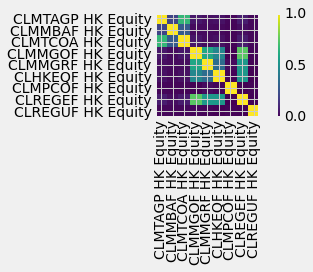

In [19]:
plotting.plot_covariance(S, plot_correlation=True,);

In [20]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

from pypfopt.expected_returns import mean_historical_return
mu = mean_historical_return(df)
mu

CLMTAGP HK Equity    0.046610
CLMMBAF HK Equity    0.050492
CLMTCOA HK Equity    0.060675
CLMMGOF HK Equity    0.053327
CLMMGRF HK Equity    0.021444
CLHKEQF HK Equity    0.068545
CLMPCOF HK Equity    0.004749
CLREGEF HK Equity    0.012969
CLREGUF HK Equity    0.032321
dtype: float64

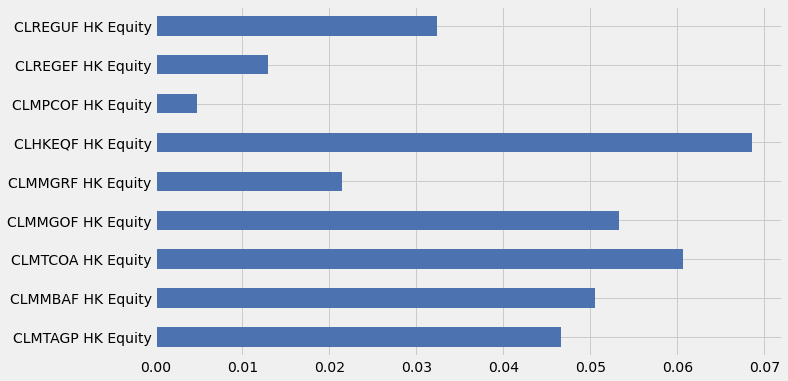

In [21]:
mu.plot.barh(figsize=(10,6))


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1a - Portfolio Optimization for maximal Sharpe ratio

### i.e. What combo of funds to choose within a scheme to earn the most and risk the least? 

In [22]:
#Optimize for maximal Sharpe ratio.
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close


OrderedDict([('CLMTAGP HK Equity', 0.58236), ('CLMMBAF HK Equity', 0.0), ('CLMTCOA HK Equity', 0.0), ('CLMMGOF HK Equity', 0.0), ('CLMMGRF HK Equity', 0.0), ('CLHKEQF HK Equity', 0.01958), ('CLMPCOF HK Equity', 0.0), ('CLREGEF HK Equity', 0.0), ('CLREGUF HK Equity', 0.39806)])


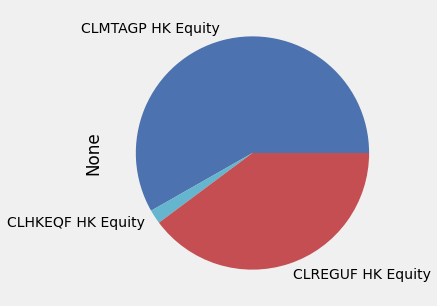

In [23]:
pd.Series(weights).plot.pie(figsize=(5,5))

In [24]:
performance = ef.portfolio_performance(verbose=True)

Expected annual return: 4.1%
Annual volatility: 1.1%
Sharpe Ratio: 1.91


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 1b - Discrete Allocation of each fund

### i.e. How many shares for each fund should I buy?

In [25]:
#!pip install pulp

In [26]:
#Input amount of your portfolio
#tpv = float(input("Amount of your portfolio:"))     #Interactive element hidden for now.

In [27]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
print("Latest Price of all funds")
latest_prices

Latest Price of all funds


CLMTAGP HK Equity    11.5916
CLMMBAF HK Equity    26.8300
CLMTCOA HK Equity    12.1043
CLMMGOF HK Equity    28.3300
CLMMGRF HK Equity    15.3000
CLHKEQF HK Equity    17.6800
CLMPCOF HK Equity    10.9961
CLREGEF HK Equity    11.8200
CLREGUF HK Equity    15.1100
Name: 2020-07-31 00:00:00, dtype: float64

In [28]:
cleaned_weights = ef.clean_weights()
weights = cleaned_weights 
#da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=tpv)     #Interactive element hidden for now.
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)     #Hide this if using input() function.
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'CLMTAGP HK Equity': 753, 'CLHKEQF HK Equity': 17, 'CLREGUF HK Equity': 395}
Funds remaining: $2.52


Text(0.5, 1.0, 'Performance of Funds')

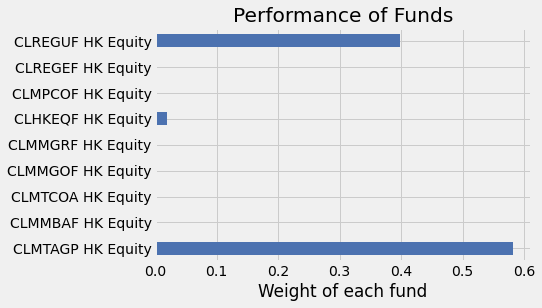

In [29]:
pd.Series(weights).plot.barh()
plt.xlabel('Weight of each fund')
plt.title("Performance of Funds")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 2a - Portfolio Optimization with given Risk Tolerance

### i.e. If your risk tolerance is higher, tell us what you expect and earn more return!

In [30]:
#Input your risk tolerance.
#rt = float(input("Your Risk tolerance in decimals:"))     #Interactive element hidden for now.

In [31]:
ef = EfficientFrontier(mu, S)

#ef.efficient_risk(target_volatility=rt)           #Interactive element hidden for now.
ef.efficient_risk(target_volatility=0.1)           #Hide this when using input() function
weights = ef.clean_weights()
weights

OrderedDict([('CLMTAGP HK Equity', 0.0),
             ('CLMMBAF HK Equity', 0.0),
             ('CLMTCOA HK Equity', 0.11814),
             ('CLMMGOF HK Equity', 0.0),
             ('CLMMGRF HK Equity', 0.0),
             ('CLHKEQF HK Equity', 0.88186),
             ('CLMPCOF HK Equity', 0.0),
             ('CLREGEF HK Equity', 0.0),
             ('CLREGUF HK Equity', 0.0)])

Text(0.5, 1.0, 'Fund Portfolio')

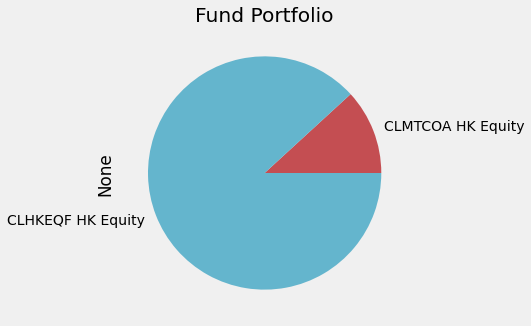

In [32]:
pd.Series(weights).plot.pie(figsize=(5,5))
plt.title("Fund Portfolio")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Function 3 - Minimise risk for a given return

In [35]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.efficient_return(target_return=0.05, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('CLMTAGP HK Equity', 0.88771),
             ('CLMMBAF HK Equity', -0.00657),
             ('CLMTCOA HK Equity', 0.0693),
             ('CLMMGOF HK Equity', 0.07081),
             ('CLMMGRF HK Equity', -0.16493),
             ('CLHKEQF HK Equity', 0.07846),
             ('CLMPCOF HK Equity', -1.0),
             ('CLREGEF HK Equity', -0.09169),
             ('CLREGUF HK Equity', 0.1569)])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting Efficient Frontier

In [36]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 3.5%
Annual volatility: 0.9%
Sharpe Ratio: 1.62


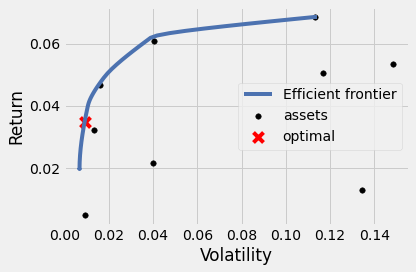

In [37]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# This scheme in a nutshell:

##         Any portfolio with volatility higher than 11.3% is bad because you earn the same afterwards. The highest return you can get is 6.9%.

In [40]:
risktolerance, annualreturn = [], []
for rt2 in np.arange(0.01, 1, 0.001):
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(target_volatility=rt2)
    weights = ef.clean_weights()
    ret, volatility, Sharpe = ef.portfolio_performance(verbose=True)
    annualreturn.append(ret)
    risktolerance.append(rt2)


Expected annual return: 3.8%
Annual volatility: 1.0%
Sharpe Ratio: 1.80
Expected annual return: 4.1%
Annual volatility: 1.1%
Sharpe Ratio: 1.91
Expected annual return: 4.3%
Annual volatility: 1.2%
Sharpe Ratio: 1.89
Expected annual return: 4.4%
Annual volatility: 1.3%
Sharpe Ratio: 1.85
Expected annual return: 4.5%
Annual volatility: 1.4%
Sharpe Ratio: 1.80
Expected annual return: 4.6%
Annual volatility: 1.5%
Sharpe Ratio: 1.75
Expected annual return: 4.7%
Annual volatility: 1.6%
Sharpe Ratio: 1.70
Expected annual return: 4.8%
Annual volatility: 1.7%
Sharpe Ratio: 1.66
Expected annual return: 4.9%
Annual volatility: 1.8%
Sharpe Ratio: 1.62
Expected annual return: 5.0%
Annual volatility: 1.9%
Sharpe Ratio: 1.58
Expected annual return: 5.1%
Annual volatility: 2.0%
Sharpe Ratio: 1.54
Expected annual return: 5.2%
Annual volatility: 2.1%
Sharpe Ratio: 1.50
Expected annual return: 5.2%
Annual volatility: 2.2%
Sharpe Ratio: 1.47
Expected annual return: 5.3%
Annual volatility: 2.3%
Sharpe Rati

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.3%
Sharpe Ratio: 0.43
Expected annual return: 6.9%
Annual volatility: 11.

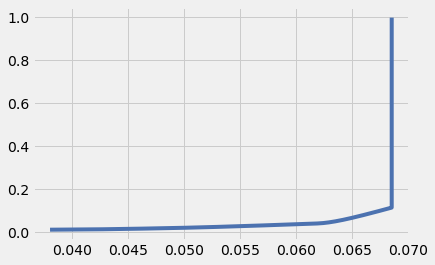

In [41]:
plt.plot(annualreturn, risktolerance)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
#anomaly detection - benchmark abnormal situations, find 